In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("pima_indian_data.csv")
print(f"Number of rows:{df.shape[0]}")
print(f"Number of columns:{df.shape[1]}")

Number of rows:768
Number of columns:9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number  of times pregnant   768 non-null    int64  
 1   Plasma glucose              768 non-null    int64  
 2   Diastolic blood pressure    768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   serum insulin               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

Looks like there are no null values

In [5]:
df.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Exploration

In [6]:
df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

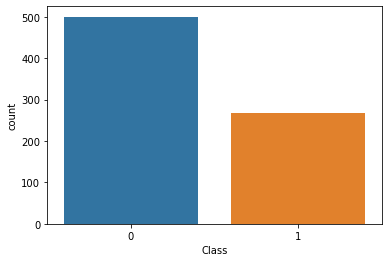

In [7]:
ax = sns.countplot(x="Class",data = df);

In [8]:
count_1_class = len(df[df['Class']==1])
count_0_class = len(df[df['Class']==0])
percent_class_1 = count_1_class/(count_1_class + count_0_class)
percent_class_0 = count_0_class/(count_1_class + count_0_class)
print("percentage of 1's in Class column: ",percent_class_1*100)
print("percentage of 0's in Class column: ",percent_class_0*100)

percentage of 1's in Class column:  34.89583333333333
percentage of 0's in Class column:  65.10416666666666


Not so evenly balanced out dataset percentage of postives are less

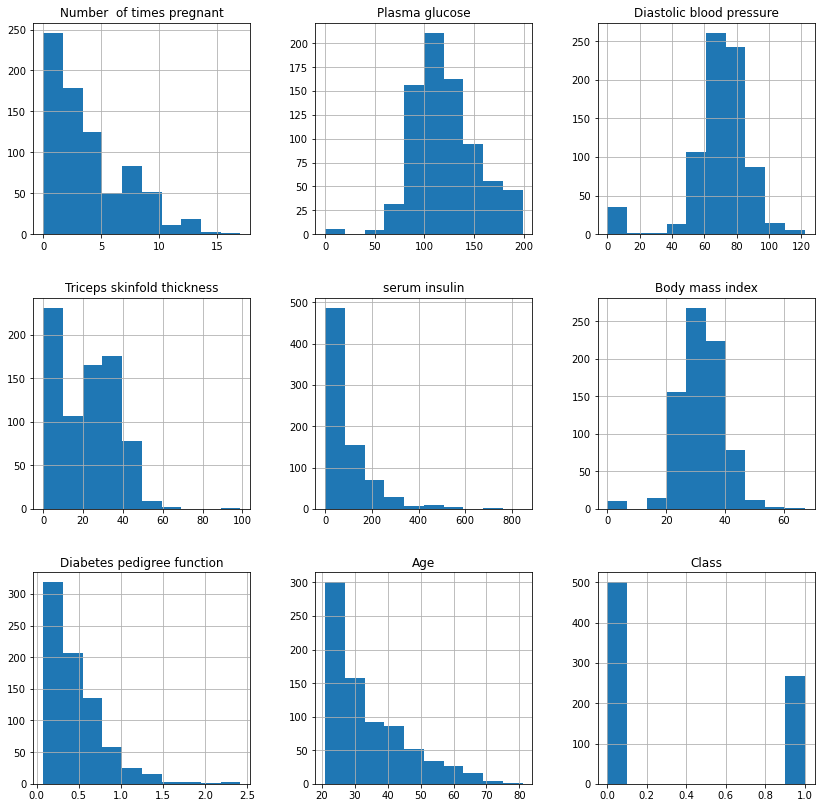

In [9]:
#histogram of columns
df.hist(figsize=(14,14))
plt.show()

#### Correlation Matrix for all the columns

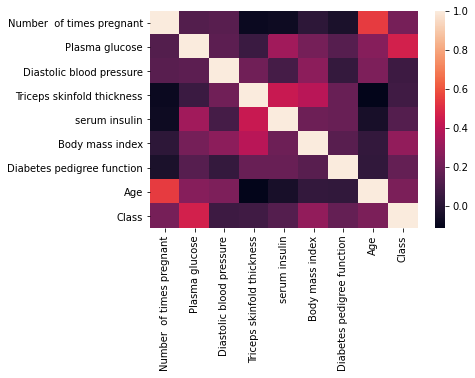

In [10]:
sns.heatmap(df.corr())
plt.show()

#### Plotting a scatter matrix for all the columns

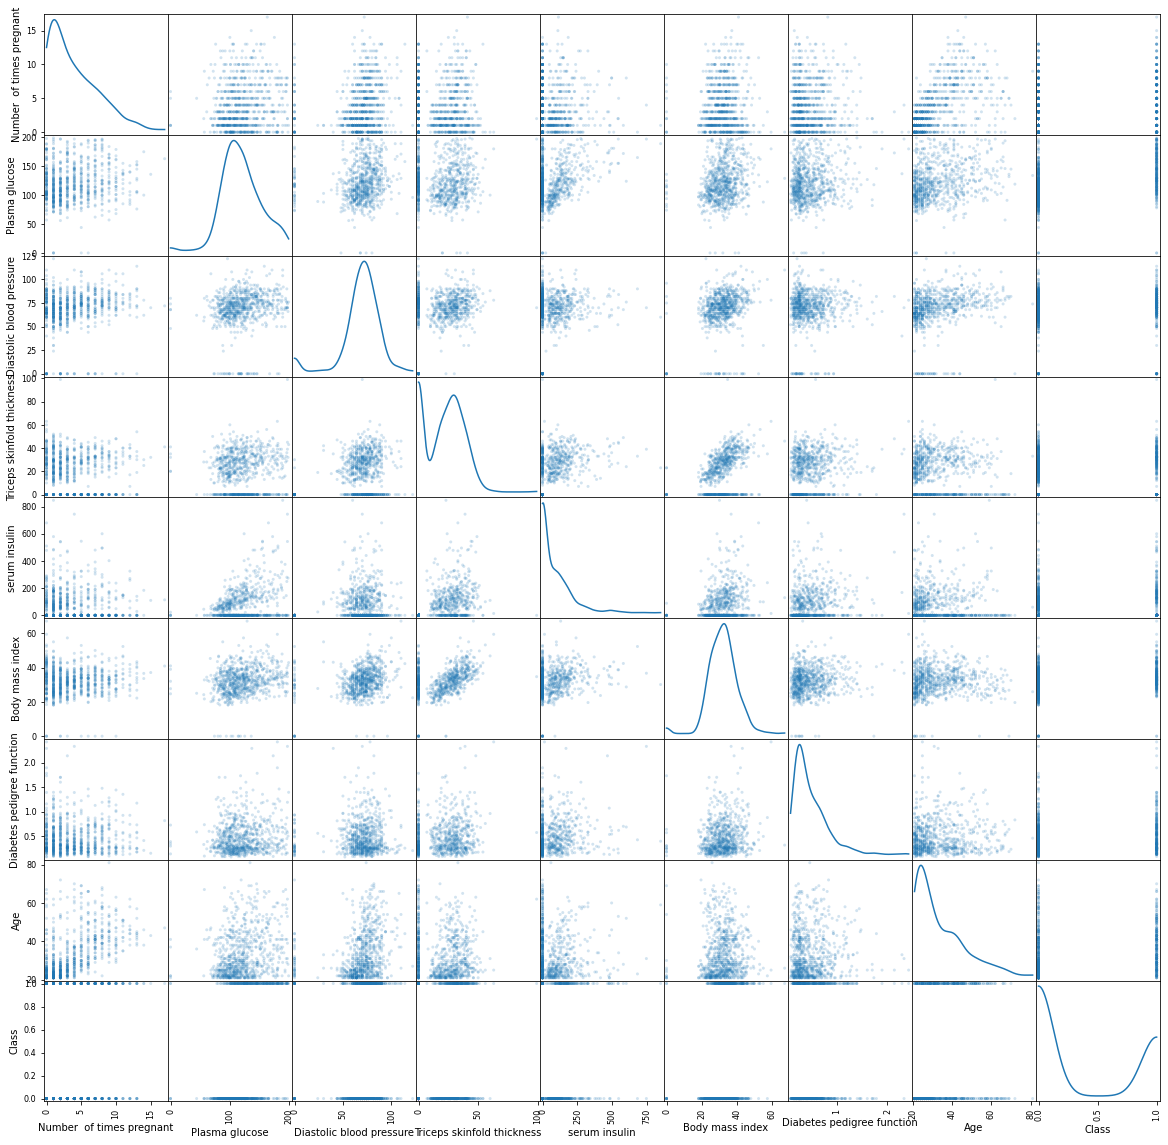

In [11]:
scatter_matrix(df, alpha=0.2, figsize=(20,20), diagonal='kde');

#### Training and test splits

In [12]:
def generate_splits():
    y = df['Class']
    X = df[[x for x in df.columns if x != 'Class']]

    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

# X = df[[x for x in df.columns if x != 'Class']]
# y= df['Class']
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.20)
# print(f'Training samples: {X_train.shape[0]:,}')
# print(f'Test samples: {X_test.shape[0]:,}')

Training examples: 614
Test examples: 154


In [13]:
X_train

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age
300,0,167,0,0,0,32.3,0.839,30
750,4,136,70,0,0,31.2,1.182,22
717,10,94,72,18,0,23.1,0.595,56
694,2,90,60,0,0,23.5,0.191,25
554,1,84,64,23,115,36.9,0.471,28
...,...,...,...,...,...,...,...,...
572,3,111,58,31,44,29.5,0.430,22
409,1,172,68,49,579,42.4,0.702,28
435,0,141,0,0,0,42.4,0.205,29
346,1,139,46,19,83,28.7,0.654,22


#### Modeling pipeline with no penalty

In [14]:
num_vars = df[[x for x in df.columns if x != 'Class']].columns
num_pipeline = Pipeline ([('standardize_num', StandardScaler())])
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('standardize_num',
                                                  StandardScaler())]),
                                 Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age'],
      dtype='object'))])


In [15]:
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                ('logreg', LogisticRegression(penalty='none'))])

In [16]:
m = modeling_pipeline.fit(X_train, y_train)
predicted = m.predict(X_test)

We gain intuition into how our model performed by evaluating accuracy.

In [17]:
modeling_pipeline.score(X_train, y_train)

0.7736156351791531

we can see that our model is not overfitting 

In [18]:
modeling_pipeline.score(X_test, y_test)

0.8116883116883117

#### Classification Report

In [19]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       103
           1       0.78      0.61      0.68        51

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



From our classification report we can see that our model has a precision of 67% and a recall rate of 52%, Our model is doing well as it is almost 67% percent accurate.

#### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,predicted)
confusion

array([[94,  9],
       [20, 31]], dtype=int64)

From our confusion matrix, we can see that our model got (86+28) 114 predictions right and got (7+23) 40 predictions wrong.

#### Grid Search Cross Validation

In [21]:
modeling_pipeline_sag = Pipeline([('data_processing', processing_pipeline),
                              ('logreg', LogisticRegression(penalty='l2', solver='sag'))])
modeling_pipeline_sag

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age'],
      dtype='object'))])),
                ('logreg', LogisticRegression(solver='sag'))])

In [22]:
modeling_pipeline_lbfgs = Pipeline([('data_processing', processing_pipeline),
                              ('logreg', LogisticRegression(penalty='l2', solver='lbfgs'))])
modeling_pipeline_lbfgs

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age'],
      dtype='object'))])),
                ('logreg', LogisticRegression())])

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'logreg__C':[0.01, 0.1, 1, 10,100]}]

gcv_results_sag = GridSearchCV(estimator= modeling_pipeline_sag, param_grid=param_grid, scoring='recall', cv = 10)
gcv_results_sag = gcv_results_sag.fit(X_train, y_train)

##### Grid search cross valuation results for train data using sag

In [24]:
gcv_results_sag.best_score_

0.5811688311688312

In [25]:
gcv_results_sag.best_params_

{'logreg__C': 1}

In [26]:
gcv_results_sag.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age'],
      dtype='object'))])),
                ('logreg', LogisticRegression(C=1, solver='sag'))])

#### Determining how this performs on test data

In [27]:
predicted_sag = gcv_results_sag.predict(X_test)

print(classification_report(y_test, predicted_sag))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       103
           1       0.78      0.61      0.68        51

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



Looks like model is performing same with any solver even after adding weights

#### Grid Search Cross validation using lbfgs solver

In [28]:
gcv_results_lbfgs = GridSearchCV(estimator= modeling_pipeline_lbfgs, param_grid=param_grid, scoring='recall', cv = 10)
gcv_results_lbfgs = gcv_results_lbfgs.fit(X_train, y_train)

In [29]:
gcv_results_lbfgs.best_score_

0.5811688311688312

In [30]:
gcv_results_lbfgs.best_params_

{'logreg__C': 1}

In [31]:
gcv_results_lbfgs.best_estimator_ 

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age'],
      dtype='object'))])),
                ('logreg', LogisticRegression(C=1))])

#### Determining how this performs of test data

In [32]:
predicted_lbfgs = gcv_results_lbfgs.predict(X_test)

print(classification_report(y_test, predicted_lbfgs))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       103
           1       0.78      0.61      0.68        51

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



Suprisingly there is no difference in all the classification report even after adding regularization weights and for two different solvers as well we could not see any difference for accuracy or recall.